In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
brazil_cities_rev2022  = pd.read_csv('data/BRAZIL_CITIES_REV2022.CSV', error_bad_lines=False)
# brazil_cities  = pd.read_csv('data/BRAZIL_CITIES.CSV', error_bad_lines=False)
brazil_cities_rev2022.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876,6876,0,2137,1546,591,5300,...,0,0,0,2158,1246,0,0,0,0,1
1,Abadia Dos Dourados,MG,0,6704,6704,0,2328,1481,847,4154,...,0,0,0,2227,1142,0,0,0,0,1
2,Abadiânia,GO,0,15757,15609,148,4655,3233,1422,10656,...,1,33724584,67091904,2838,1426,0,0,0,0,3
3,Abaetetuba,PA,0,141100,141040,60,31061,19057,12004,82956,...,4,76181384,800078483,5277,25661,0,0,0,0,2
4,Abaeté,MG,0,22690,22690,0,7694,6667,1027,18464,...,2,44974716,371922572,6928,2953,0,0,0,0,4


# Motivation 
The motivation behind this piece of data analysis is to outline the similarities between different cities on different regions.
Directly creating a clustering of the cities. 
Seconds, I wish to outline the socio-economic axis/belts of Brazil. (eg. manufacturing belt, agriculture belt, poverty clusters... )

In [6]:
brazil_cities_rev2022.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

# Initial Exploration 
Checking for quality of life data.

In [42]:
# creating the quality of life dataframe and the geografical location for reference. 
# first check if the index data are registered for all of them, meaning, different than one. 

life_brazil = brazil_cities_rev2022[['CITY','STATE','CAPITAL','IDHM Ranking 2010','IDHM','IDHM_Renda','IDHM_Longevidade','IDHM_Educacao','LONG','LAT']]
print(len(life_brazil))
life_brazil = life_brazil[(life_brazil['IDHM_Longevidade']>0) & (life_brazil['IDHM_Renda']>0)]
print(len(life_brazil))
life_brazil

5578
5568


,CITY,STATE,CAPITAL,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT
0,Abadia De Goiás,GO,0,1689,0.708,0.687,0.830,0.622,-49.4405,-16.7588
1,Abadia Dos Dourados,MG,0,2207,0.689,0.693,0.839,0.563,-47.3968,-18.4876
2,Abadiânia,GO,0,2202,0.689,0.671,0.841,0.579,-48.7188,-16.1827
3,Abaetetuba,PA,0,3530,0.628,0.579,0.798,0.537,-48.8844,-1.7235
4,Abaeté,MG,0,1994,0.698,0.720,0.848,0.556,-45.4462,-19.1558
...,...,...,...,...,...,...,...,...,...,...
5573,Áurea,RS,0,1709,0.707,0.715,0.841,0.588,-52.0542,-27.6938
5574,Ângulo,PR,0,1282,0.721,0.705,0.827,0.644,-51.9174,-23.1929
5575,Érico Cardoso,BA,0,4555,0.584,0.558,0.758,0.471,-42.1362,-13.4223
5576,Óbidos,PA,0,4294,0.594,0.556,0.756,0.499,-55.5163,-1.9092


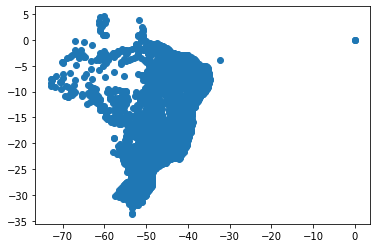

In [43]:
# testing the plot for the geografical data. 
# I will probably need to declare a function to reuse it. 

plt.scatter(life_brazil['LONG'],life_brazil['LAT'])


In [62]:
# fixing cities that 
life_brazil[life_brazil['LONG'] ==0]

life_brazil.at[2558,"LONG"] = -38.4789

life_brazil.at[2558,"LAT"] = -6.47001

life_brazil.at[3766,"LONG"] =-51.22450000

life_brazil.at[3766,"LAT"] =-27.88164000 


life_brazil.at[4620,"LONG"] =-35.66845000 

life_brazil.at[4620,"LAT"] = -6.14234000

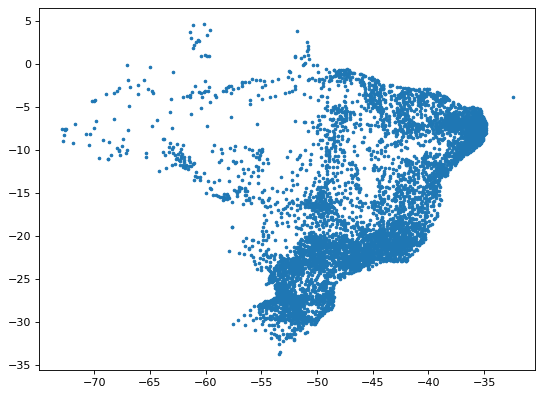

In [67]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.scatter(life_brazil['LONG'],life_brazil['LAT'],s= 5)


In [76]:


top_life = life_brazil.sort_values(by = 'IDHM Ranking 2010').head(10)
top_longeve = life_brazil.sort_values(by = 'IDHM_Longevidade',ascending=False).head(10)
top_edu = life_brazil.sort_values(by = 'IDHM_Educacao',ascending=False).head(10)
top_longeve

,CITY,STATE,CAPITAL,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT
597,Blumenau,SC,0,25,0.806,0.812,0.894,0.722,-49.0576,-26.9161
432,Balneário Camboriú,SC,0,4,0.845,0.854,0.894,0.789,-48.6346,-26.9918
4182,Rio Do Sul,SC,0,36,0.802,0.793,0.894,0.727,-49.6432,-27.2179
754,Brusque,SC,0,56,0.795,0.794,0.894,0.707,-48.9152,-27.0983
4072,Rancho Queimado,SC,0,488,0.753,0.743,0.893,0.644,-49.0084,-27.6772
4179,Rio Do Oeste,SC,0,472,0.754,0.769,0.892,0.625,-49.8029,-27.1912
2556,Joaçaba,SC,0,8,0.827,0.823,0.891,0.771,-51.5067,-27.1739
3349,Nova Trento,SC,0,590,0.748,0.749,0.891,0.628,-48.9258,-27.2878
3926,Porto União,SC,0,89,0.786,0.752,0.891,0.724,-51.0816,-26.2300
2181,Iomerê,SC,0,57,0.795,0.754,0.891,0.749,-51.2406,-27.0011


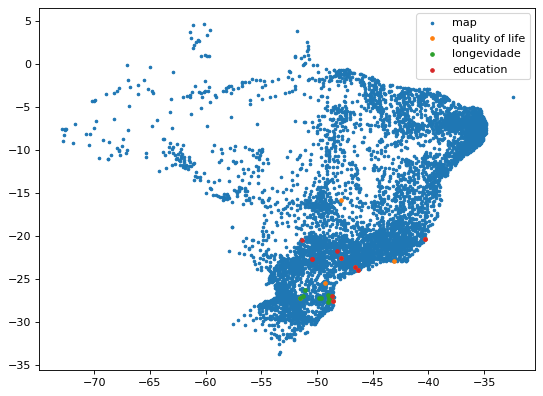

In [78]:

from cProfile import label

figure(figsize=(8, 6), dpi=80)
plt.scatter(life_brazil['LONG'],life_brazil['LAT'],s= 5,label='map')
plt.scatter(top_life['LONG'],top_life['LAT'],s= 10,label='quality of life')
plt.scatter(top_longeve['LONG'],top_longeve['LAT'],s= 10,label='longevidade')
plt.scatter(top_edu['LONG'],top_edu['LAT'],s= 10,label='education')
plt.legend()
plt.show()

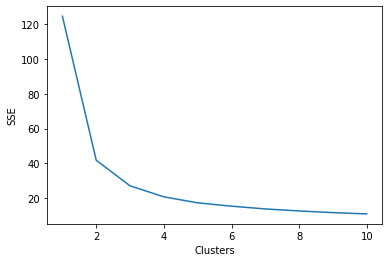

array([[0.708, 0.687, 0.83 , 0.622],
       [0.689, 0.693, 0.839, 0.563],
       [0.689, 0.671, 0.841, 0.579],
       ...,
       [0.584, 0.558, 0.758, 0.471],
       [0.594, 0.556, 0.756, 0.499],
       [0.73 , 0.713, 0.858, 0.637]])

In [81]:
# trying to get the k-means of this dataset
X = life_brazil.iloc[:,4:8].values

wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()
# 3 clusters ? 

In [86]:
k_means_optimum = KMeans(n_clusters = 5, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(X)
life_brazil['cluster'] = y  

In [89]:
cluster_0 = life_brazil[life_brazil['cluster'] == 0]
cluster_1 = life_brazil[life_brazil['cluster'] == 1]
cluster_2 = life_brazil[life_brazil['cluster'] == 2]
cluster_3 = life_brazil[life_brazil['cluster'] == 3]
cluster_4 = life_brazil[life_brazil['cluster'] == 4]

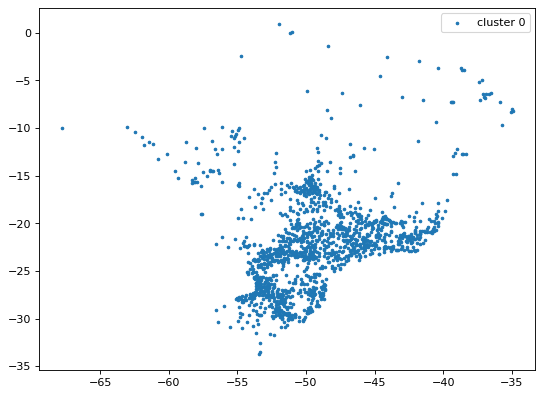

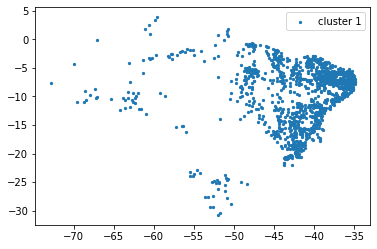

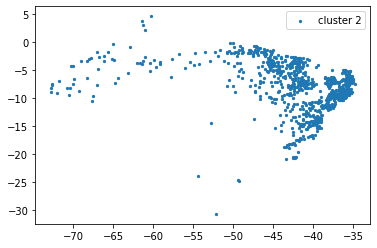

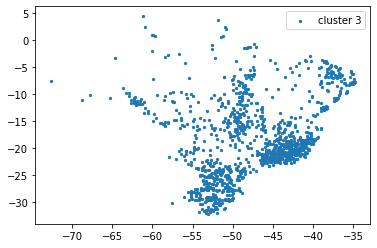

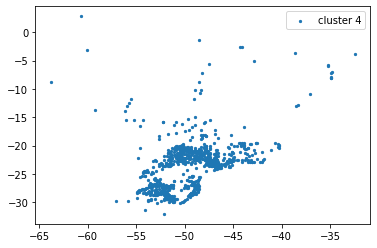

In [91]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(cluster_0['LONG'],cluster_0['LAT'],s= 5,label='cluster 0')
plt.legend()
plt.show()
plt.scatter(cluster_1['LONG'],cluster_1['LAT'],s= 5,label='cluster 1')
plt.legend()
plt.show()
plt.scatter(cluster_2['LONG'],cluster_2['LAT'],s= 5,label='cluster 2')
plt.legend()
plt.show()
plt.scatter(cluster_3['LONG'],cluster_3['LAT'],s= 5,label='cluster 3')
plt.legend()
plt.show()
plt.scatter(cluster_4['LONG'],cluster_4['LAT'],s= 5,label='cluster 4')


plt.legend()
plt.show()